In [1]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

import os


In [2]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import chardet

def get_encoding(file_path):
    with open(file_path, 'rb') as file:
        return chardet.detect(file.read())['encoding']

def preprocess_text(text):
    
    custom_stop_words = ['text', 'doc']

    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    text = text.lower()
    
    text = ' '.join([word for word in text.split() if word not in custom_stop_words])
    
    text = text.replace('<', '').replace('>', '')

    return text



# Function to process each file within a given directory
def process_files_in_directory(directory_path):
    documents = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            encoding = get_encoding(file_path)  # Automatically detect file encoding
            try:
                with open(file_path, 'r', encoding=encoding) as file:  # Use the detected encoding
                    text = file.read()
                    cleaned_text = preprocess_text(text)
                    documents.append(cleaned_text)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
    return documents

# Paths to your directories
directory_paths = [
    "/Users/gozi/Desktop/text mining/Homework8/f-d",
    "/Users/gozi/Desktop/text mining/Homework8/m-d",
    "/Users/gozi/Desktop/text mining/Homework8/f-r",
    "/Users/gozi/Desktop/text mining/Homework8/m-r"
]

# Initialize an empty list to hold all documents
documents = []

# Process files within each directory
for directory_path in directory_paths:
    documents.extend(process_files_in_directory(directory_path))



In [6]:
vectorizer=CountVectorizer(input='content',
                        stop_words='english',
                        max_features=100)


X = vectorizer.fit_transform(documents)
ColNames = vectorizer.get_feature_names_out()
df_vector=pd.DataFrame(X.toarray(), columns=ColNames)

In [7]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)
##----------------------------------------------------

for nextcol in df_vector.columns:
    #print(nextcol)
    ## Remove unwanted columns
    #Result=str.isdigit(nextcol) ## Fast way to check numbers
    #print(Result)
    
    ##-------------call the function -------
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)

    ## The following will remove any column with name
    ## of 3 or smaller - like "it" or "of" or "pre".
    ##print(len(nextcol))  ## check it first
    ## NOTE: You can also use this code to CONTROL
    ## the words in the columns. For example - you can
    ## have only words between lengths 5 and 9. 
    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<=2):
        print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)
    
    
print(df_vector)

mr
ms
     act  administration  amendment  america  american  americans  believe  \
0    140              24         12       95       200         75       28   
1    206              22         81       57       101         38       38   
2    203              75        100       60        82         46       61   
3     64               8         11       10        41         17       10   
4     59               4         16        2        11         12        2   
..   ...             ...        ...      ...       ...        ...      ...   
424   69              16         20       10        30         18       14   
425   77               5         50       14        48         17        8   
426   53               6         26       50        98         23       24   
427   81              12         74       60        88         55       61   
428   43               6         10       12        24         16       15   

     billion  budget  care  ...  vote  want  war  way  wo

In [11]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer


In [24]:

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

custom_stop_words = ['ms', 'text', 'doc', 'mr','act', 'like']

all_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words)



MyVectLDA_DH=CountVectorizer(input='content', stop_words=all_stop_words)

Vect_DH = MyVectLDA_DH.fit_transform(df_vector)
ColumnNamesLDA_DH=MyVectLDA_DH.get_feature_names()
CorpusDF_DH=pd.DataFrame(Vect_DH.toarray(),columns=ColumnNamesLDA_DH)
print(CorpusDF_DH)


lda_model_DH = LatentDirichletAllocation(n_components=5, max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(Vect_DH)

print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Let's see how the first document in the corpus looks like in
## different topic spaces
print(LDA_DH_Model[0])
print(LDA_DH_Model[6])
print("List of prob: ")
print(LDA_DH_Model)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


    administration  amendment  america  american  americans  believe  billion  \
0                0          0        0         0          0        0        0   
1                1          0        0         0          0        0        0   
2                0          1        0         0          0        0        0   
3                0          0        1         0          0        0        0   
4                0          0        0         1          0        0        0   
..             ...        ...      ...       ...        ...      ...      ...   
90               0          0        0         0          0        0        0   
91               0          0        0         0          0        0        0   
92               0          0        0         0          0        0        0   
93               0          0        0         0          0        0        0   
94               0          0        0         0          0        0        0   

    budget  care  chairman 

In [26]:
print("List of prob: ")
print(LDA_DH_Model)

List of prob: 
[[0.2        0.2        0.2        0.2        0.2       ]
 [0.1000267  0.5999045  0.10002375 0.10002311 0.10002193]
 [0.10002806 0.10002438 0.10002507 0.10002435 0.59989814]
 [0.10002679 0.59990448 0.10002376 0.10002308 0.10002189]
 [0.1000282  0.10002437 0.10002506 0.10002444 0.59989793]
 [0.1000268  0.59990426 0.10002379 0.10002316 0.100022  ]
 [0.59992059 0.10001993 0.10002056 0.10001997 0.10001895]
 [0.10002676 0.10002314 0.10002369 0.59990457 0.10002185]
 [0.10002603 0.10002244 0.59990777 0.10002252 0.10002124]
 [0.5999207  0.10001999 0.1000205  0.10001991 0.10001891]
 [0.10002675 0.1000231  0.10002372 0.59990455 0.10002188]
 [0.10002672 0.59990451 0.10002373 0.10002314 0.1000219 ]
 [0.10002823 0.1000244  0.10002512 0.10002439 0.59989785]
 [0.10002684 0.59990437 0.10002375 0.10002305 0.10002199]
 [0.10002818 0.10002436 0.1000251  0.10002439 0.59989797]
 [0.10002604 0.10002249 0.59990763 0.10002251 0.10002134]
 [0.10002676 0.59990446 0.10002375 0.1000231  0.10002193]

/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9319/3436890496.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


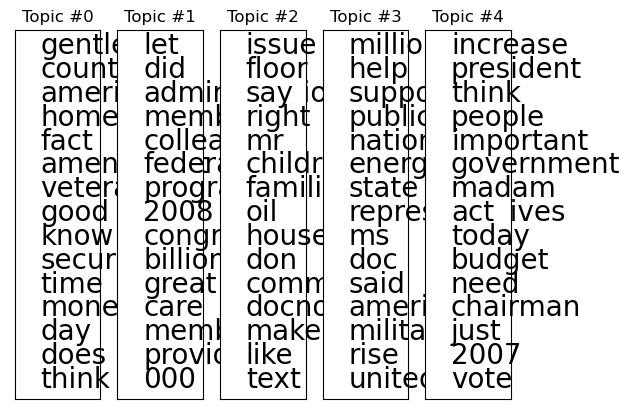

In [25]:
import matplotlib.pyplot as plt
import numpy as np

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColNames)
num_topics = 5

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20


for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()




In [42]:


lda_model_DH10 = LatentDirichletAllocation(n_components=10, max_iter=100, learning_method='online')
LDA_DH_Model = lda_model_DH10.fit_transform(Vect_DH)


print("List of prob: ")
print(LDA_DH_Model)

List of prob: 
LatentDirichletAllocation(learning_method='online', max_iter=100)


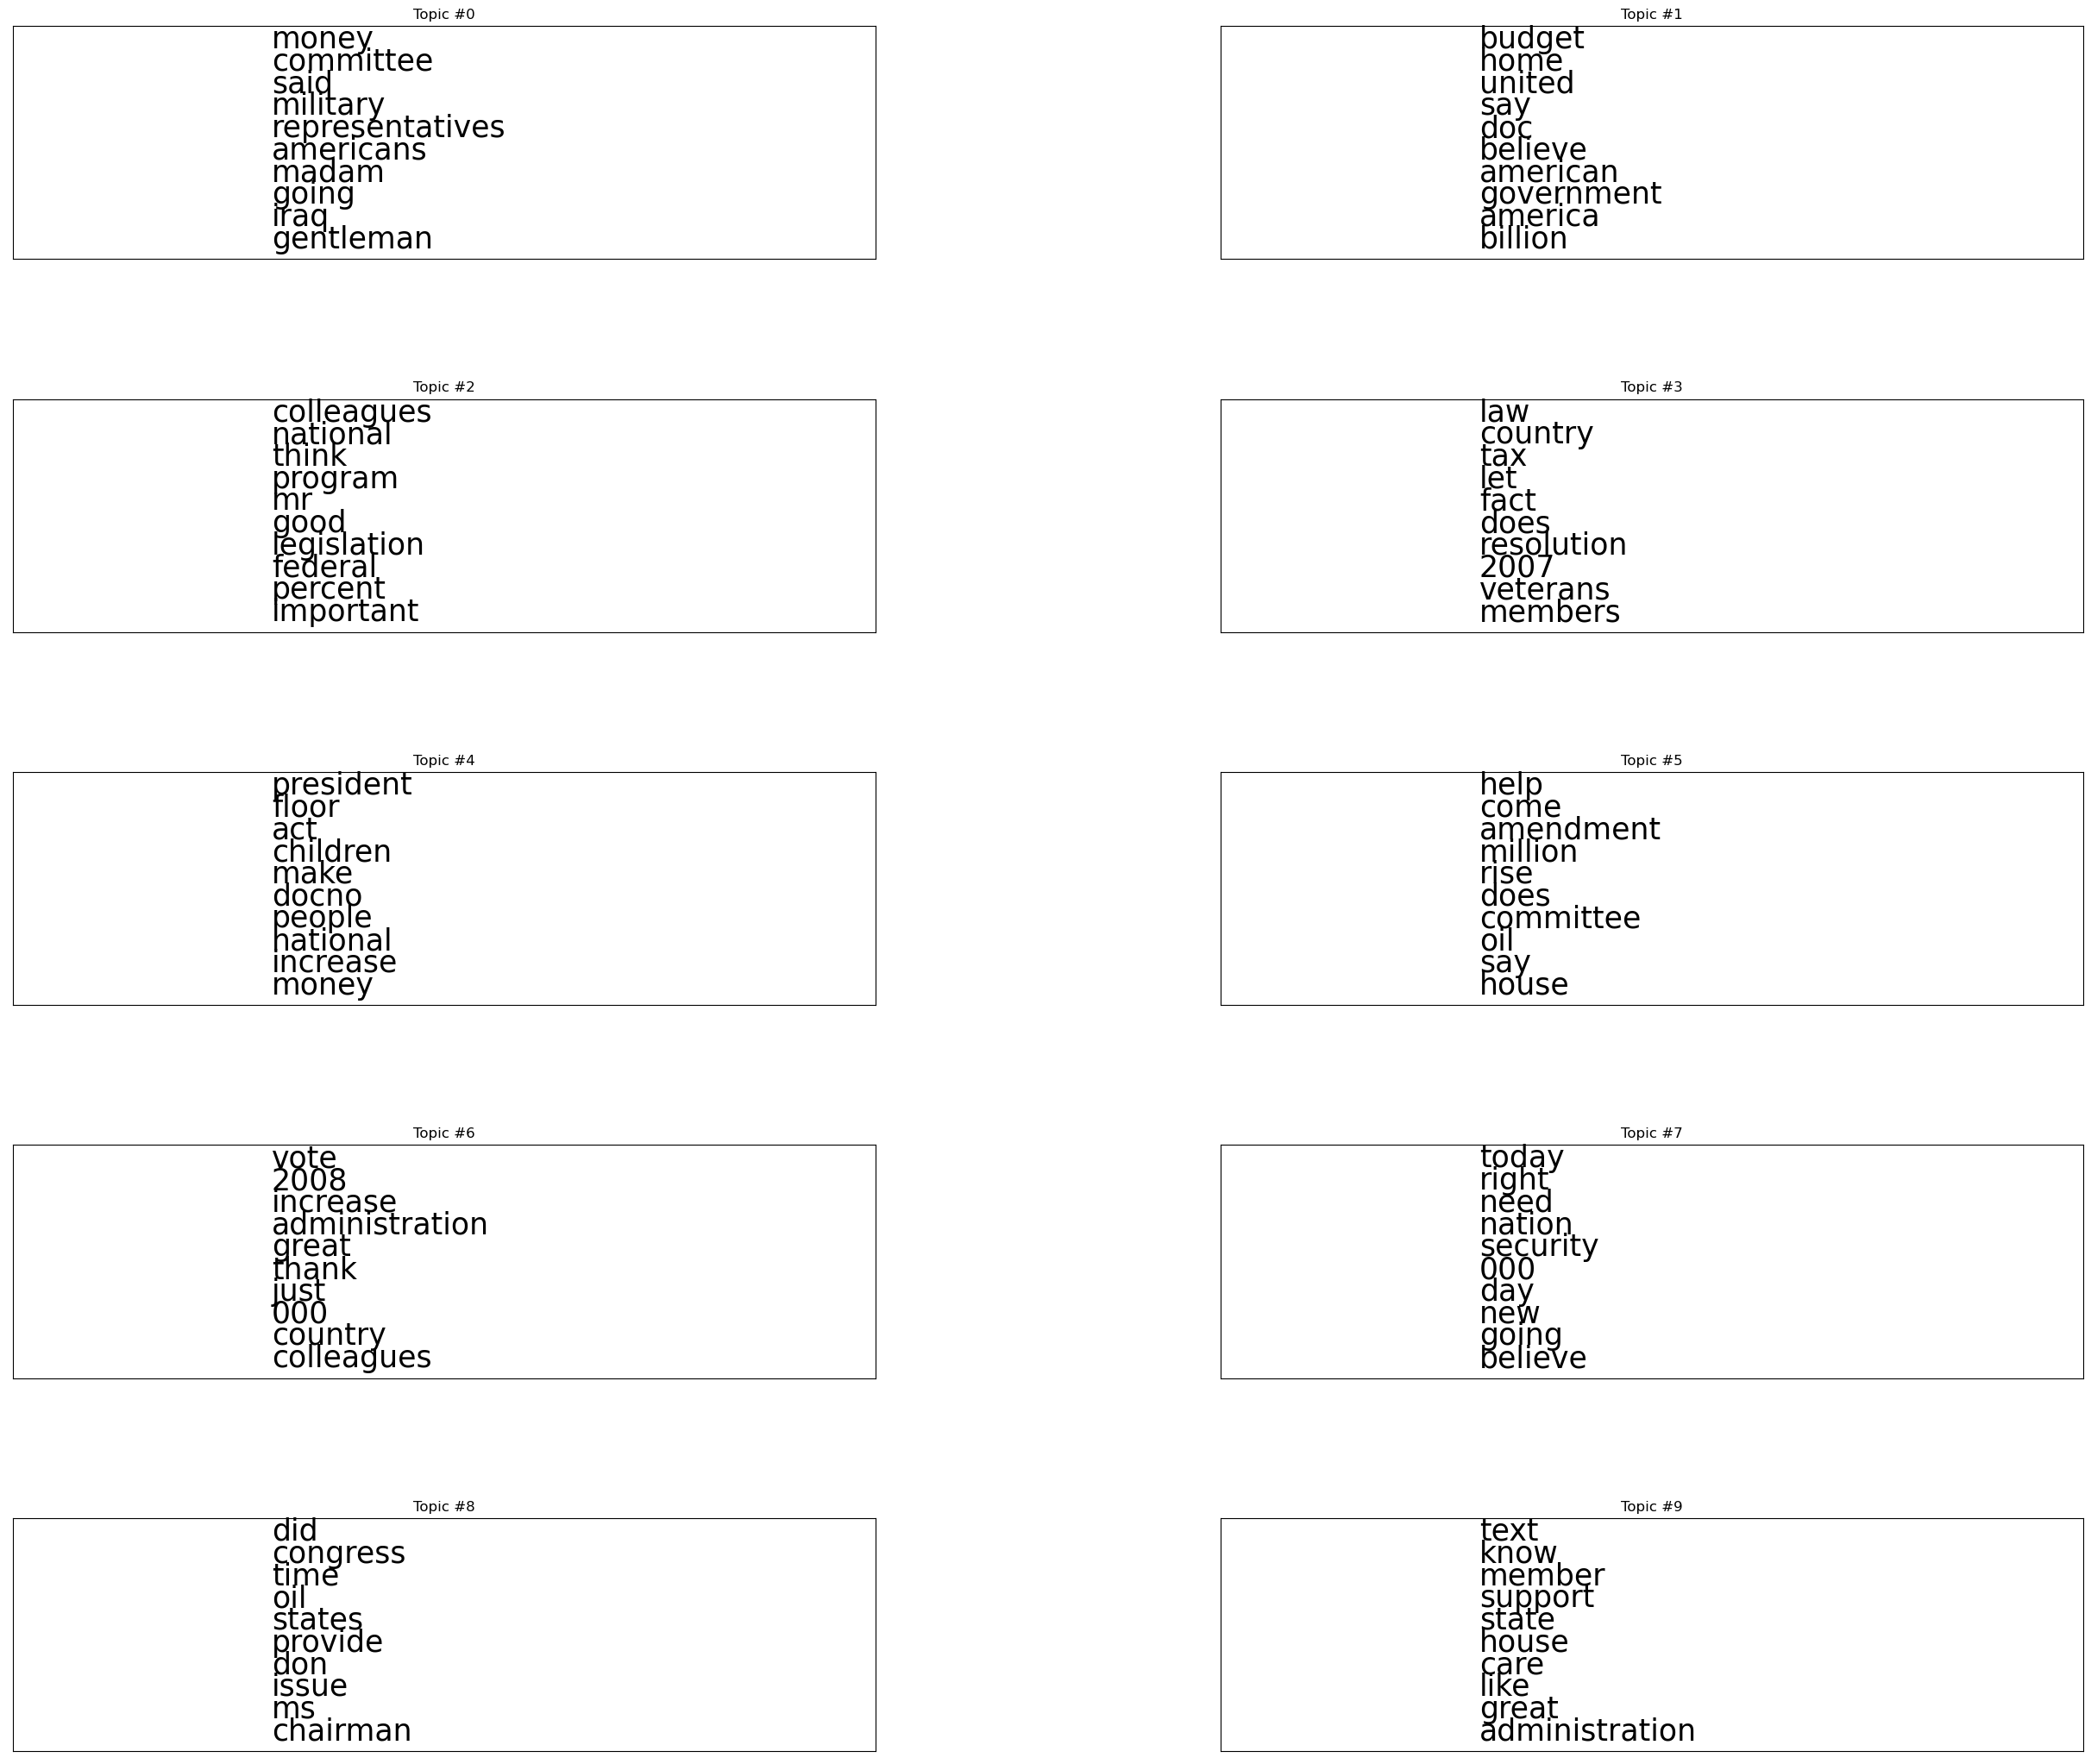

In [38]:
import matplotlib.pyplot as plt
import numpy as np


word_topic = np.array(lda_model_DH10.components_).transpose()

num_top_words = 10
vocab_array = np.asarray(ColNames)
num_topics = 10
fontsize_base = 25

# Increase the overall figure size
plt.figure(figsize=(30, 25))  

# Adjust layout to accommodate 5 rows of subplots (2 topics per row)
for t in range(num_topics):
    plt.subplot(5, 2, t + 1)  # Adjust for 5 rows and 2 columns
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:, t])[::-1]  # Get indices of top words
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)

# Improve the layout to prevent overlapping subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

plt.show()
